<a href="https://colab.research.google.com/github/kenleytaniar/Data_science/blob/main/capstone_bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

# dir adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
dir = '/content/drive/My Drive/dataset_bengkod/ObesityDataSet.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

Mounted at /content/drive


In [4]:

# Load dataset
ori_data = pd.read_csv(dir)

# Simbol umum yang menunjukkan nilai hilang
missing_symbols = ['?', 'NA', 'N/A', '-', '--', 'null', 'Null', 'none', 'None', '']

# Ganti simbol tersebut dengan NaN
df = ori_data.replace(missing_symbols, np.nan)


In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2089 non-null   object
 1   Gender                          2089 non-null   object
 2   Height                          2089 non-null   object
 3   Weight                          2092 non-null   object
 4   CALC                            2091 non-null   object
 5   FAVC                            2089 non-null   object
 6   FCVC                            2093 non-null   object
 7   NCP                             2089 non-null   object
 8   SCC                             2093 non-null   object
 9   SMOKE                           2098 non-null   object
 10  CH2O                            2096 non-null   object
 11  family_history_with_overweight  2088 non-null   object
 12  FAF                             2092 non-null   

In [8]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2089,2089,2089,2092,2091,2089,2093,2089,2093,2098,2096,2088,2092,2096,2093,2099,2111
unique,1393,2,1561,1517,4,2,807,636,2,2,1262,2,1185,1129,4,5,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [9]:
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [10]:
df.nunique()

,0
Age,1393
Gender,2
Height,1561
Weight,1517
CALC,4
FAVC,2
FCVC,807
NCP,636
SCC,2
SMOKE,2


In [11]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
663,21,Female,1.52,42,Sometimes,yes,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
763,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
764,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
824,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I


In [12]:
#konversi object ke int
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['FCVC'] = pd.to_numeric(df['FCVC'], errors='coerce')
df['NCP'] = pd.to_numeric(df['NCP'], errors='coerce')
df['CH2O'] = pd.to_numeric(df['CH2O'], errors='coerce')
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

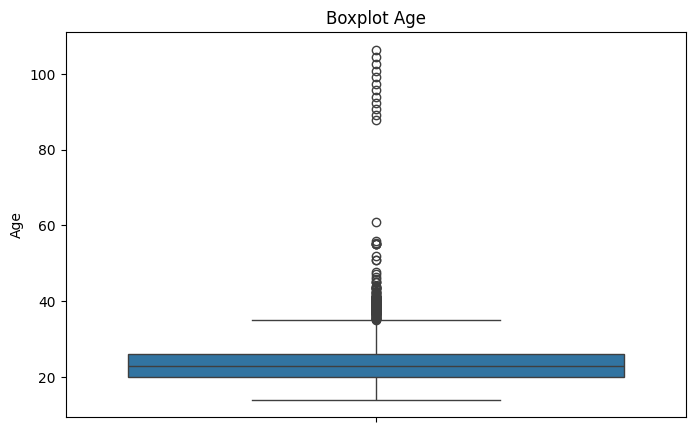

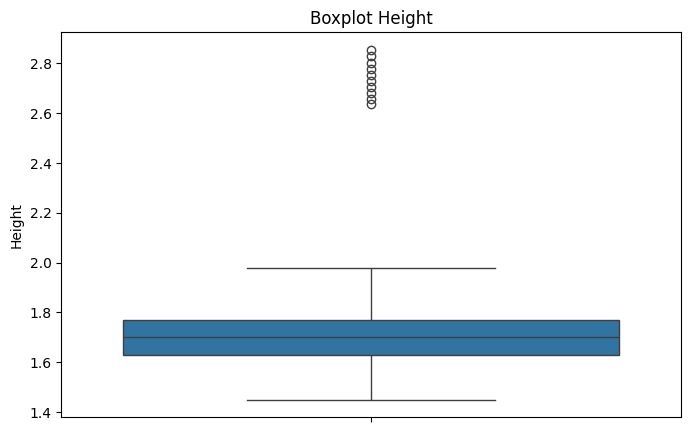

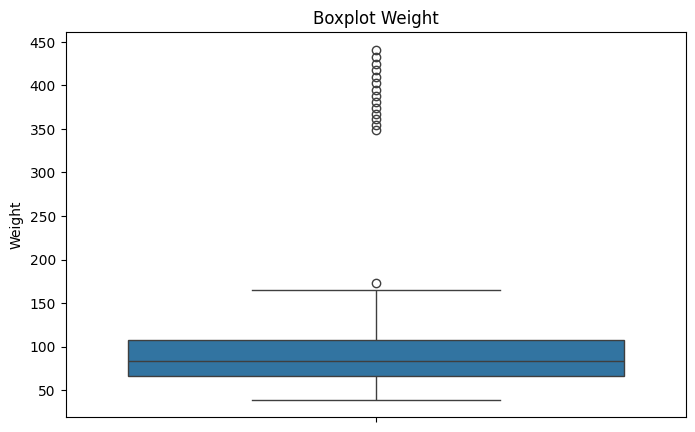

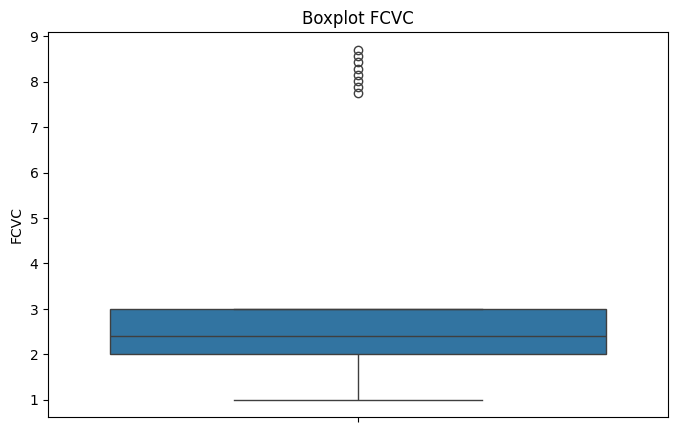

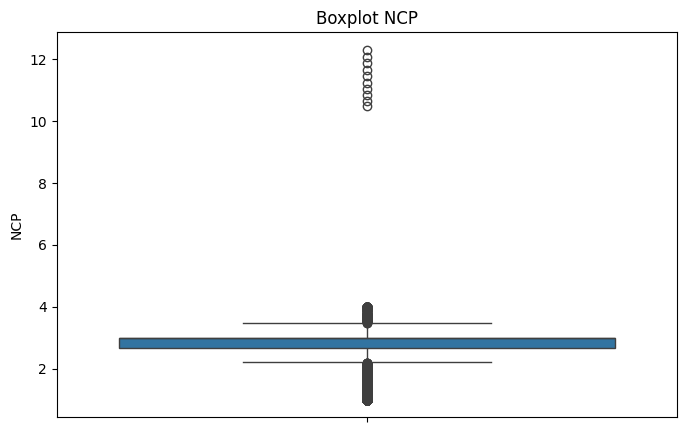

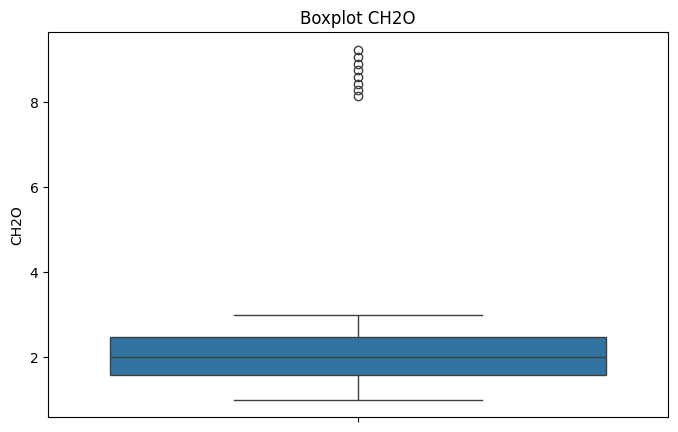

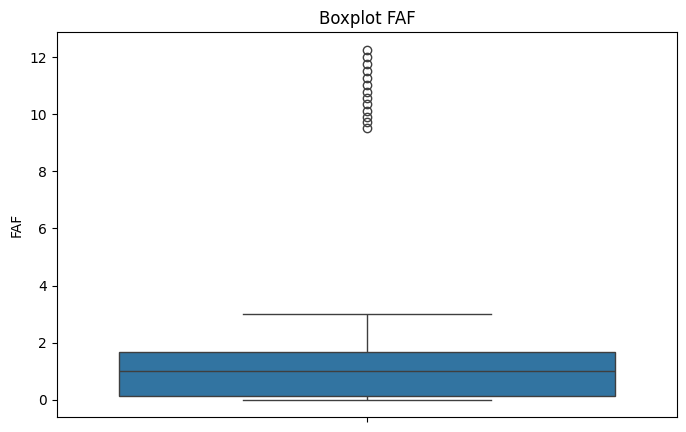

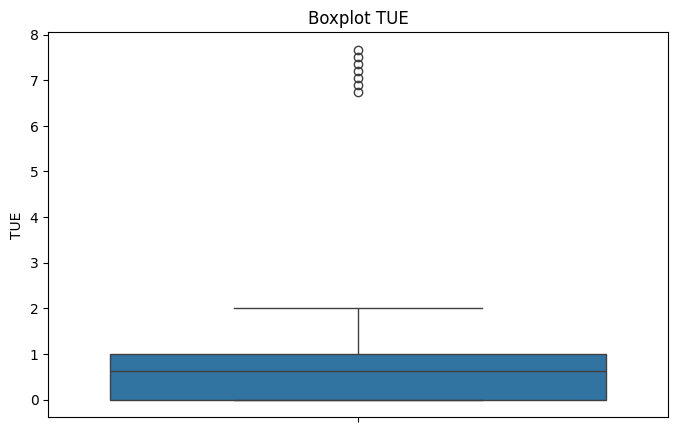

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Buat boxplot untuk tiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

# **2. Preprocessing Data**

In [15]:
df_clean = df.copy()

In [16]:
df_clean.isnull().sum()


,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [40]:
df["NObeyesdad"].value_counts()


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [17]:
df_clean.dropna(inplace=True)


In [18]:
df_clean.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1811 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1811 non-null   float64
 1   Gender                          1811 non-null   object 
 2   Height                          1811 non-null   float64
 3   Weight                          1811 non-null   float64
 4   CALC                            1811 non-null   object 
 5   FAVC                            1811 non-null   object 
 6   FCVC                            1811 non-null   float64
 7   NCP                             1811 non-null   float64
 8   SCC                             1811 non-null   object 
 9   SMOKE                           1811 non-null   object 
 10  CH2O                            1811 non-null   float64
 11  family_history_with_overweight  1811 non-null   object 
 12  FAF                             1811 no

In [20]:
#hapus outlier dan duplicate
df_clean = df_clean.drop_duplicates()

def remove_outliers(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
    return df_out

numeric_cols = ['Age', 'Height', 'Weight']

df_clean = remove_outliers(df_clean, numeric_cols)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1607 non-null   float64
 1   Gender                          1607 non-null   object 
 2   Height                          1607 non-null   float64
 3   Weight                          1607 non-null   float64
 4   CALC                            1607 non-null   object 
 5   FAVC                            1607 non-null   object 
 6   FCVC                            1607 non-null   float64
 7   NCP                             1607 non-null   float64
 8   SCC                             1607 non-null   object 
 9   SMOKE                           1607 non-null   object 
 10  CH2O                            1607 non-null   float64
 11  family_history_with_overweight  1607 non-null   object 
 12  FAF                             1607 no

# **3. Pemodelan dan Evaluasi**

In [67]:
#train test data
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

#encoding label
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col].astype(str))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. SMOTE untuk mengatasi data imbalance
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# 6. Normalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']


=== Logistic Regression ===
[[39  3 12  1  0  1  0]
 [19 20  5  0  1  8  2]
 [ 2  3 19  6  0  2  7]
 [ 0  0  1 44  0  0  0]
 [ 0  0  1  0 44  0  0]
 [ 0  5  7  0  0 25  5]
 [ 0  1  3  1  0 10 25]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        56
           1       0.62      0.36      0.46        55
           2       0.40      0.49      0.44        39
           3       0.85      0.98      0.91        45
           4       0.98      0.98      0.98        45
           5       0.54      0.60      0.57        42
           6       0.64      0.62      0.63        40

    accuracy                           0.67       322
   macro avg       0.67      0.67      0.67       322
weighted avg       0.67      0.67      0.66       322


=== Decision Tree ===
[[48  7  0  1  0  0  0]
 [ 2 47  0  0  0  5  1]
 [ 0  0 34  2  0  0  3]
 [ 0  0  0 44  1  0  0]
 [ 0  0  0  0 45  0  0]
 [ 0  7  0  0  0 35  0]
 [ 0  0  0  0  0  3 37]]
             

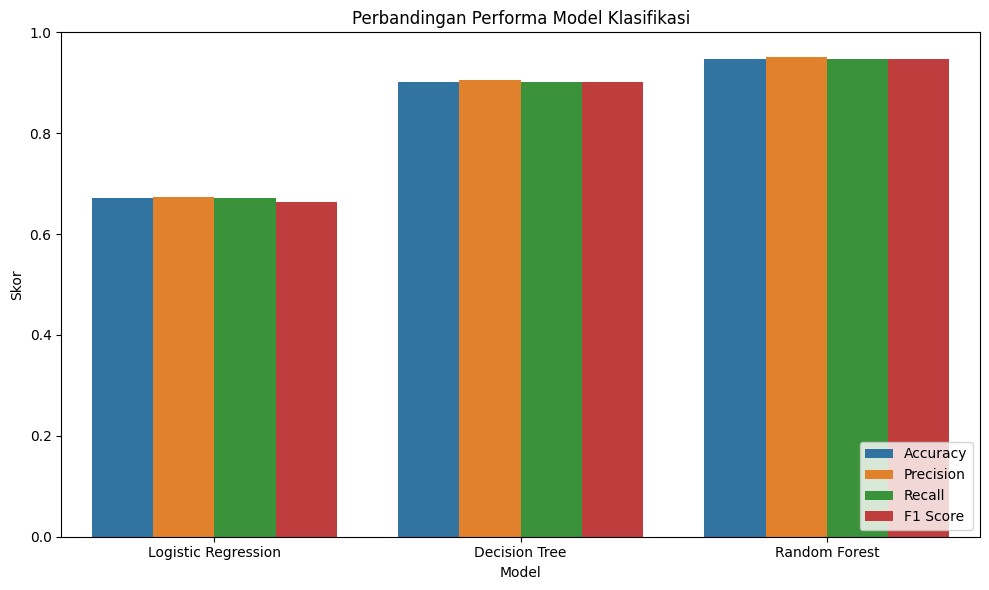


 Kesimpulan
Model dengan skor F1 tertinggi:
Model        Random Forest
Accuracy          0.947205
Precision         0.950119
Recall            0.947205
F1 Score          0.947911
Name: 2, dtype: object


In [23]:
#model training

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Visualisasi perbandingan model
results_df = pd.DataFrame(results)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Perbandingan Performa Model Klasifikasi")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("\n Kesimpulan")
print("Model dengan skor F1 tertinggi:")
print(results_df.sort_values('F1 Score', ascending=False).iloc[0])

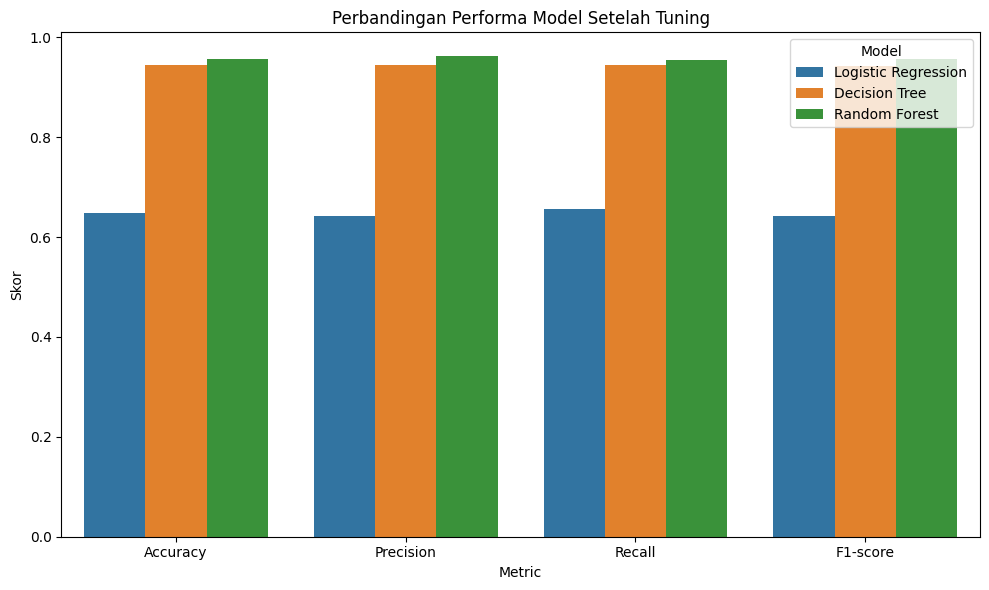

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.649068   0.641548  0.655465  0.641333
1        Decision Tree  0.944099   0.943833  0.944412  0.943176
2        Random Forest  0.956522   0.961784  0.954394  0.957196


In [24]:
models_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
             'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]
        }
    }
}

# 7. Latih dan evaluasi
best_models = {}
results = []

for name, mp in models_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)

    best_models[name] = clf.best_estimator_
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": np.mean([v["precision"] for k, v in report.items() if k.isdigit()]),
        "Recall": np.mean([v["recall"] for k, v in report.items() if k.isdigit()]),
        "F1-score": np.mean([v["f1-score"] for k, v in report.items() if k.isdigit()])
    })

# 8. Visualisasi
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Perbandingan Performa Model Setelah Tuning")
plt.ylabel("Skor")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

print(results_df)

In [63]:
import joblib

# Ambil model Random Forest terbaik
best_rf = best_models["Random Forest"]
rf_default = models['Random Forest']
lr = models['Logistic Regression']
dt = models['Decision Tree']

# Simpan model ke file
joblib.dump(best_rf, 'best_rf.pkl')
joblib.dump(rf_default, 'rf_default.pkl')
joblib.dump(lr, 'lr.pkl')
joblib.dump(dt, 'dt.pkl')
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [27]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [29]:
!pip install streamlit pyngrok --quiet


In [75]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load model, scaler, dan label encoder
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

st.title("Prediksi Kategori Obesitas")
st.markdown("Aplikasi ini memprediksi kategori obesitas berdasarkan data kesehatan.")

# Input dari user
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Umur", min_value=1, max_value=100, step=1)
height = st.number_input("Tinggi Badan (meter)", min_value=1.0, max_value=2.5, step=0.01)
weight = st.number_input("Berat Badan (kg)", min_value=20, max_value=200, step=1)
favc = st.selectbox("Sering makan tinggi kalori (FAVC)?", ["yes", "no"])
fcvc = st.slider("Frekuensi makan sayur (1–3)", 1, 3)
ncp = st.slider("Jumlah makan utama/hari (1–4)", 1, 4)
scc = st.selectbox("Sedang diet (SCC)?", ["yes", "no"])
smoke = st.selectbox("Merokok?", ["yes", "no"])
ch2o = st.slider("Minum air putih/hari (CH2O)", 1, 3)
family_history = st.selectbox("Riwayat obesitas keluarga?", ["yes", "no"])
faf = st.slider("Frekuensi olahraga (0–3)", 0, 3)
tue = st.slider("Waktu penggunaan teknologi (0–2 jam)", 0, 2)
caec = st.selectbox("Makan di luar rumah (CAEC)?", ["no", "Sometimes", "Frequently", "Always"])
mtrans = st.selectbox("Transportasi utama", ["Walking", "Bike", "Public_Transportation", "Automobile", "Motorbike"])
calc = st.selectbox("Konsumsi alkohol (CALC)?", ["no", "Sometimes", "Frequently", "Always"])

# Encode binary kategorikal
gender = 1 if gender == "Male" else 0
favc = 1 if favc == "yes" else 0
scc = 1 if scc == "yes" else 0
smoke = 1 if smoke == "yes" else 0
family_history = 1 if family_history == "yes" else 0

# Mapping untuk multikategori
caec_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
mtrans_map = {"Walking": 0, "Bike": 1, "Public_Transportation": 2, "Automobile": 3, "Motorbike": 4}
calc_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}

caec = caec_map[caec]
mtrans = mtrans_map[mtrans]
calc = calc_map[calc]

# Gabungkan input
input_data = np.array([[age, gender, height, weight, calc, favc, fcvc, ncp,
                        scc, smoke, ch2o, family_history, faf, tue, caec, mtrans]])

# Scaling
input_scaled = scaler.transform(input_data)

# Prediksi
if st.button("Prediksi"):
    prediction = model.predict(input_scaled)
    label = label_encoder.inverse_transform(prediction)[0]
    proba = model.predict_proba(input_scaled)
    confidence = np.max(proba)

    st.success(f"Hasil Prediksi: {label}")
    st.info(f"Kepercayaan Model: {confidence:.2f}")


Overwriting app.py


In [76]:
from pyngrok import ngrok


ngrok.set_auth_token("2yP7fMwdXA7SBOfMiKYtA0mn9P3_3EdY6HG6MjS3bucmWKvZg")

# Kill jika port 8501 sedang aktif
!kill $(lsof -t -i:8501)

# Buat tunnel
public_url = ngrok.connect(addr="8501", proto="http")

print(f"Streamlit berjalan di 👉 {public_url}")

# Jalankan streamlit
!streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
Streamlit berjalan di 👉 NgrokTunnel: "https://4b24-34-56-0-11.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.56.0.11:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valid